# Assignment 3: Tree Search

__Notes:__

* Breaking ties: 
    * The order in which the children are explored (see `available directions`) makes a big difference for DFS and dealing with empty spaces. I explore the directions in random order which makes the algorithm stochastic!
    * Ties for $h(n)$ and $f(n)$ need to be broken in a consistent manner. I use the most recently added node. To try to keep moving into the same direction.
* Cycles: Cycles are avoided using the reached data structure. For DFS, we can use the reached structure for checking or, without a reached structure implement cycle checking with only parents. 
* Depth-limited search needs ideas from best-first search to work with open spaces!



Helper functions for the Maze Assignment by M. Hahsler
Usage: 
  import maze_helper as mh
  mh.show_some_mazes()
  
Here is an example maze:

XXXXXXXXXXXXXXXXXXXXXX
X XX        X X      X
X    XXXXXX X XXXXXX X
XXXXXX     S  X      X
X    X XXXXXX XX XXXXX
X XXXX X         X   X
X        XXX XXX   X X
XXXXXXXXXX    XXXXXX X
XG         XX        X
XXXXXXXXXXXXXXXXXXXXXX

The goal is at (8, 1).
Position(0,0): X
Position(8,1):  


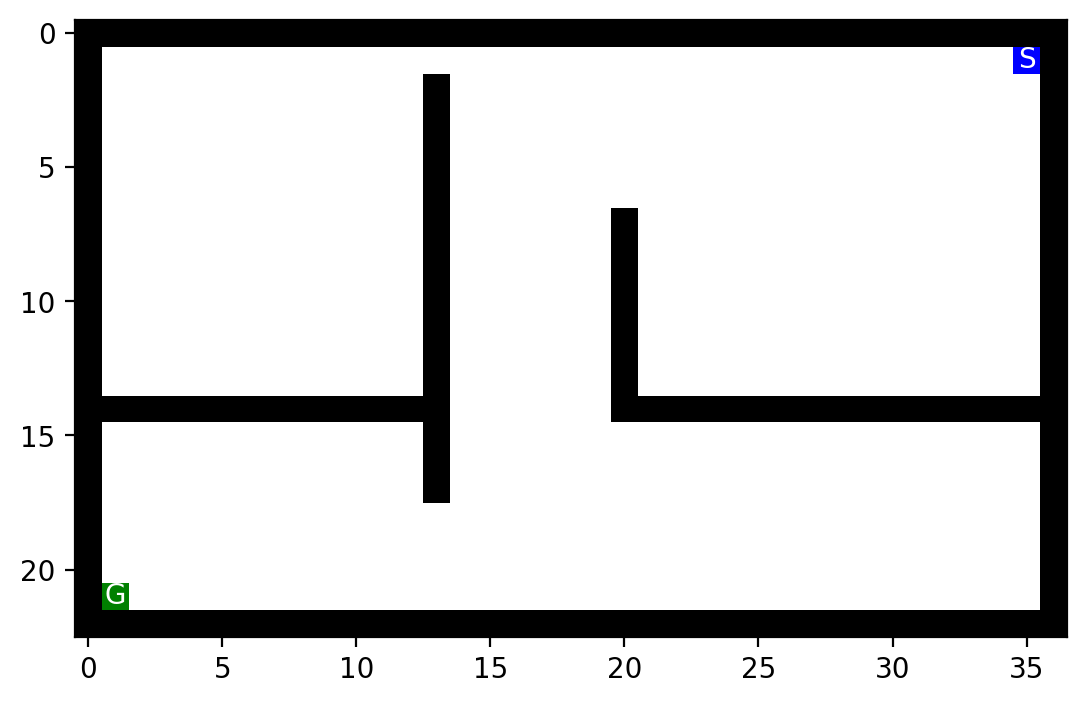

In [1]:
%run maze_helper.py
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np

#f = open("small_maze.txt", "r")
#f = open("medium_maze.txt", "r")
#f = open("large_maze.txt", "r")    # this has only one solution!
f = open("open_maze.txt", "r")
#f = open("empty_maze.txt", "r")
#f = open("empty_2_maze.txt", "r")
#f = open("wall_maze.txt", "r")
#f = open("loops_maze.txt", "r")
#f = open("L_maze.txt", "r")

maze_str = f.read()
maze = parse_maze(maze_str)

# look at two positions in the maze
print("Position(0,0):", maze[0, 0])
print("Position(8,1):", maze[8, 1])

show_maze(maze)

In [2]:
import numpy as np
from matplotlib import colors
from matplotlib import animation, rc
from IPython.display import HTML
rc('animation', html='html5')

# numpy comparison warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def maze_to_matrix(maze):  
    """convert a maze a numeric numpy array for visualization via imshow."""

    # make a deep copy first so the original maze is not changed
    maze = np.copy(maze)
    
    # Converts all tile types to integers
    maze[maze == ' '] = 0
    maze[maze == 'X'] = 1 # wall
    maze[maze == 'S'] = 2 # start
    maze[maze == 'G'] = 3 # goal
    maze[maze == 'P'] = 4 # position/final path
    maze[maze == '.'] = 5 # explored squares
    maze[maze == 'F'] = 6 # frontier
    maze = maze.astype(int)
    
    return(maze)
    
 
# Given a list of mazes, will return an animation of the search
# Based on show_maze but modified to generate animation
# Sadly I can not embed the animations in the PDF I have to submit :(
def animate_maze(result, repeat = False):
        """Build an animation from a list of mazes."""
        
        if result['path'] != None:       
            print(f"Path length: {len(result['path'])-1}")
            print(f"Reached squares: {len(result['reached'])}")
            print(f"Action sequence: {result['actions']}")
        else:
            print("No solution found.")
        
        
        mazes = result['maze_anim']
        
        cmap = colors.ListedColormap(['white', 'black', 'blue', 'green', 'red', 'gray', 'orange'])
 
        goal = find_pos(mazes[0], 'G')
        start = find_pos(mazes[0], 'S')
 
        mazes = [maze_to_matrix(m) for m in mazes]

        fig, ax = plt.subplots()
        im = ax.imshow(maze_to_matrix(mazes[0]), cmap = cmap, norm = colors.BoundaryNorm(list(range(cmap.N + 1)), cmap.N))
 
        plt.text(start[1], start[0], "S", fontsize = 10, color = "white",
                horizontalalignment = 'center',
                verticalalignment = 'center')
 
        plt.text(goal[1], goal[0], "G", fontsize = 10, color = "white",
                horizontalalignment = 'center',
                verticalalignment = 'center')

        def step(i):  
                im.set_array(maze_to_matrix(mazes[i]))
                return([im])
 
        ani = animation.FuncAnimation(
            fig, 
            step, 
            frames = len(mazes),
            repeat = repeat
        )
 
        plt.close()

        return ani


## Implementation

In [3]:
# tree_search.py has my actual implementation
from tree_search_solution import *
import tree_search_solution as tree_search

Directions are checked in the order ['N', 'E', 'S', 'W']


### Heuristics

Heuristics $h(n)$

In [4]:
def manhattan(pos1, pos2):
    """returns the Manhattan distance between two positions"""
    return(np.sum(np.abs(np.subtract(pos1, pos2))))
    
print(manhattan((0,0), (1,1)))

2


In [5]:
def euclidean(pos1, pos2):
    """returns the Euclidean distance between two positions"""
    return(np.sqrt(np.sum(np.square(np.subtract(pos1, pos2)))))

print(euclidean([0,0], [1,1]))

1.4142135623730951


In [6]:
tree_search.heuristic = manhattan
#tree_search.heuristic = euclidean

## Experiments

### BFS

I use a best-first search implementation with FIFO frontier.

In [7]:
tree_search.set_order("NESW")
#tree_search.set_order(random=True)
%time result = best_first_search(maze, strategy = "BFS", debug = False, vis = False, animation = True)

animate_maze(result)

Directions are checked in the order ['N', 'E', 'S', 'W']
CPU times: user 89.1 ms, sys: 1.25 ms, total: 90.3 ms
Wall time: 88.6 ms
Path length: 54
Reached squares: 682
Action sequence: ['S', 'S', 'S', 'S', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W']


In [8]:
#tree_search.set_order("NESW")
tree_search.set_order(random=True)
%time result = best_first_search(maze, strategy = "BFS", debug = False, vis = False, animation = True)

animate_maze(result)

Directions are checked at every step in random order.
CPU times: user 107 ms, sys: 0 ns, total: 107 ms
Wall time: 104 ms
Path length: 54
Reached squares: 682
Action sequence: ['W', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'S', 'W', 'W', 'S', 'W', 'W', 'S', 'W', 'S', 'S', 'S', 'S', 'W', 'W', 'S', 'W', 'S', 'S', 'S', 'S', 'S', 'S', 'W', 'S', 'W', 'W', 'S', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W']


The order in which we add to the frontier in the expand function makes no difference for BFS.

### DFS with no reached data structure

This has space complexity $O(bm)$ instead of $O(b^m)$ when we reuse the tree search algorithm from BFS!

Since we cannot check all cycles, we still may get infinite loops. Here are possible solutions:
* Stop after a fixed number of tries and return no solution `max_tries`.
* IDS solves this problem.

In [8]:
# Note: DFS uses LIFO so the directions come from the stack in reverse order!

# Can get stuck for empty maze since cycle checking is not strong enough! 
# I use a maximum number of tries and stop if the goal is not reached.
tree_search.set_order("NESW")
#tree_search.set_order("SENW")
#tree_search.set_order("WSEN")
#tree_search.set_order(random=True)

%time result = DFS(maze, vis = False, max_tries = 100000, debug_reached = True, animation = True)

animate_maze(result)

Directions are checked in the order ['N', 'E', 'S', 'W']
CPU times: user 25.2 ms, sys: 96 µs, total: 25.3 ms
Wall time: 23.9 ms
Path length: 54
Reached squares: 275
Action sequence: ['W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'S', 'S']


In [10]:
# Note: DFS uses LIFO so the directions come from the stack in reverse order!

# I use a maximum number of tries and stop if the goal is not reached.
#tree_search.set_order("NESW")
tree_search.set_order("ENWS")
#tree_search.set_order("WSEN")
#tree_search.set_order(random=True)

%time result = DFS(maze, vis = False, max_tries = 100000, debug_reached = True, animation = True)

animate_maze(result)

Directions are checked in the order ['E', 'N', 'W', 'S']
CPU times: user 8.83 ms, sys: 0 ns, total: 8.83 ms
Wall time: 8.68 ms
Path length: 68
Reached squares: 140
Action sequence: ['S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'W', 'W', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W']


In [ ]:
# Note: DFS uses LIFO so the directions come from the stack in reverse order!

# Can get stuck for empty maze since cycle checking is not strong enough! 
# I use a maximum number of tries and stop if the goal is not reached.
#tree_search.set_order("NESW")
#tree_search.set_order("SENW")
#tree_search.set_order("WSEN")
tree_search.set_order(random=True)

%time result = DFS(maze, vis = False, max_tries = 100000, debug_reached = True, animation = True)

animate_maze(result)

Directions are checked at every step in random order.
CPU times: user 72.8 ms, sys: 177 µs, total: 73 ms
Wall time: 70.2 ms
Path length: 226
Reached squares: 524
Action sequence: ['S', 'S', 'S', 'W', 'W', 'N', 'E', 'N', 'N', 'W', 'W', 'S', 'W', 'S', 'E', 'S', 'S', 'S', 'E', 'N', 'E', 'E', 'S', 'W', 'S', 'S', 'W', 'N', 'W', 'S', 'S', 'E', 'E', 'S', 'E', 'S', 'W', 'W', 'S', 'E', 'S', 'W', 'W', 'N', 'N', 'N', 'W', 'N', 'N', 'W', 'S', 'S', 'S', 'E', 'S', 'S', 'W', 'W', 'N', 'W', 'W', 'W', 'S', 'W', 'N', 'N', 'E', 'N', 'E', 'E', 'E', 'N', 'N', 'W', 'W', 'W', 'W', 'N', 'E', 'E', 'N', 'N', 'E', 'S', 'S', 'E', 'N', 'N', 'E', 'N', 'N', 'N', 'W', 'N', 'W', 'W', 'S', 'E', 'S', 'W', 'S', 'W', 'W', 'N', 'E', 'N', 'W', 'W', 'S', 'W', 'N', 'N', 'W', 'S', 'S', 'S', 'W', 'S', 'W', 'S', 'W', 'S', 'W', 'W', 'N', 'N', 'N', 'W', 'N', 'E', 'E', 'E', 'N', 'W', 'W', 'N', 'W', 'S', 'W', 'W', 'S', 'E', 'S', 'S', 'S', 'W', 'S', 'S', 'E', 'S', 'S', 'E', 'E', 'S', 'E', 'N', 'E', 'S', 'S', 'W', 'S', 'S', 'S', 'E', 

The order in which we expand the frontier makes a big difference for DFS. However, the best order depends on the maze.
Randomization with multiple restarts is probably a good idea.


We could do a random walk and not check for cycles. This is guaranteed to reach eventually any square including the goal, 
but creates a long path. The path could be simplified leading to the [Tremaux's algorithm](https://en.wikipedia.org/wiki/Maze_solving_algorithm).

### Run randomized DFS multiple times and use the best solution.

__Note:__ IDS takes a similar amount of time and memory, but is guaranteed optimal.

Directions are checked at every step in random order.
CPU times: user 2.12 s, sys: 69 µs, total: 2.12 s
Wall time: 2.12 s
Solutions have path_lengths of [168, 238, 214, 268, 176, 270, 276, 222, 196, 176, 194, 248, 226, 178, 198, 252, 168, 164, 168, 178, 268, 244, 150, 186, 192, 340, 214, 174, 136, 224, 278, 192, 202, 166, 154, 186, 252, 232, 130, 210, 158, 162, 202, 134, 188, 210, 164, 128, 176, 170, 130, 200, 184, 210, 250, 204, 214, 146, 206, 154, 208, 162, 232, 190, 150, 260, 280, 258, 232, 162, 184, 178, 166, 266, 188, 142, 268, 218, 196, 106, 228, 206, 204, 230, 158, 208, 174, 96, 204, 220, 174, 136, 130, 200, 226, 162, 260, 266, 212, 236]
Path length: 96
Reached squares: 0


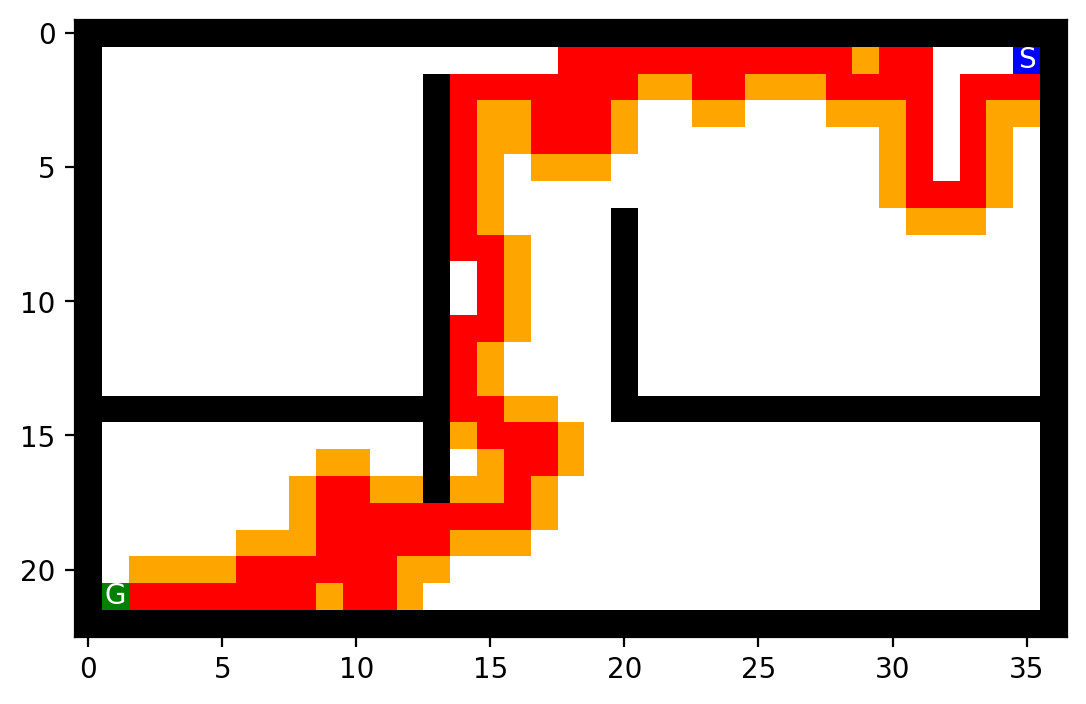

In [ ]:
tree_search.set_order(random = True)

N = 100
%time results = [ DFS(maze, max_tries = 10000, vis = False) for _ in range(N) ]

# check if we found a solution and display the best solution
results = [ r for r in results if not r['path'] is None ]
if len(results) > 0:
    path_lengths = [ len(r['path'])-1 for r in results ]

    print(f"Solutions have path_lengths of {path_lengths}")

    result = results[min_index(path_lengths)]
    show_path(maze, result)
else:
    print("No solution found!")

### Depth limited DFS

DFS does not store the explored search tree for visualization so we show it using the tree search implementation.

In [ ]:
tree_search.set_order(random = True)

#%time result = DFS(maze, limit = 10, debug = False, vis = False)
%time result = best_first_search(maze, strategy = "DFS", limit = 5, debug = False, vis = False, animation = True)

animate_maze(result)

Directions are checked at every step in random order.
CPU times: user 4.15 ms, sys: 146 µs, total: 4.3 ms
Wall time: 1.42 ms
No solution found.


Directions are checked in the order ['N', 'E', 'S', 'W']
CPU times: user 673 µs, sys: 24 µs, total: 697 µs
Wall time: 602 µs
Reached squares: 17


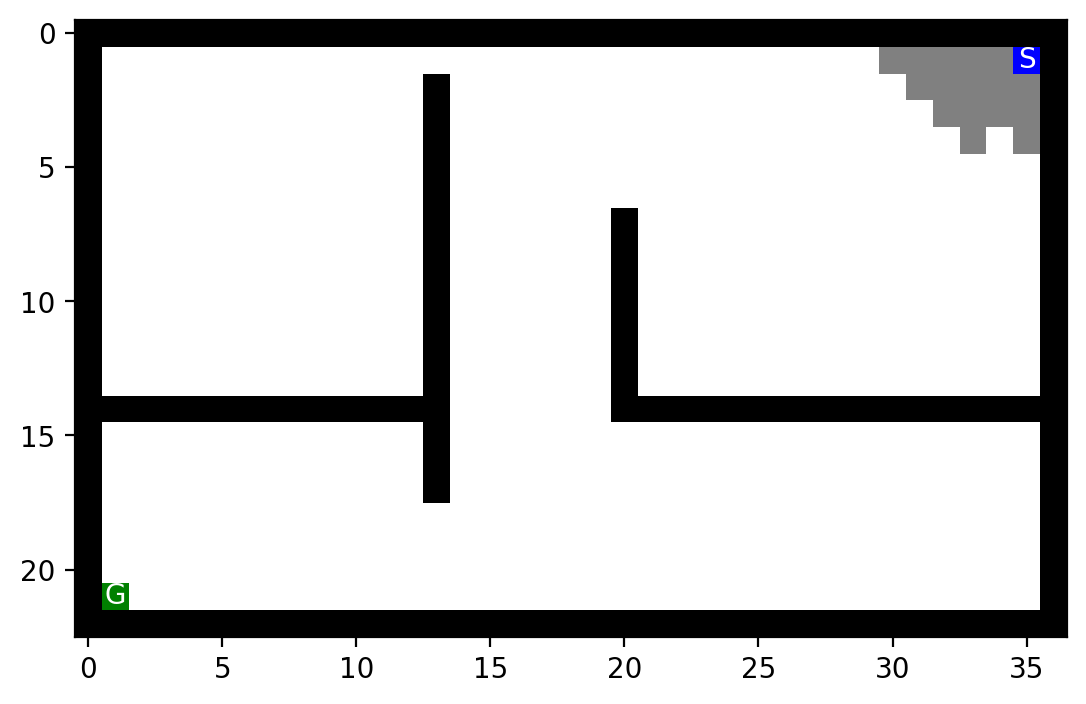

No solution found.


In [ ]:
#tree_search.set_order(random=True)
tree_search.set_order("NESW")

%time result = DFS(maze, limit = 5, vis = False, debug_reached = True, animation = True)

show_path(maze, result)

animate_maze(result)

### IDS

__Notes:__ 

* IDS with DFS does not store reached squares, so gray areas are not shown!

* IDS depends on the cycle checking of DFS and therefore is also affected by these problems.

Directions are checked at every step in random order.
CPU times: user 2.56 s, sys: 4.23 ms, total: 2.57 s
Wall time: 2.57 s
Path length: 120
Reached squares: 0


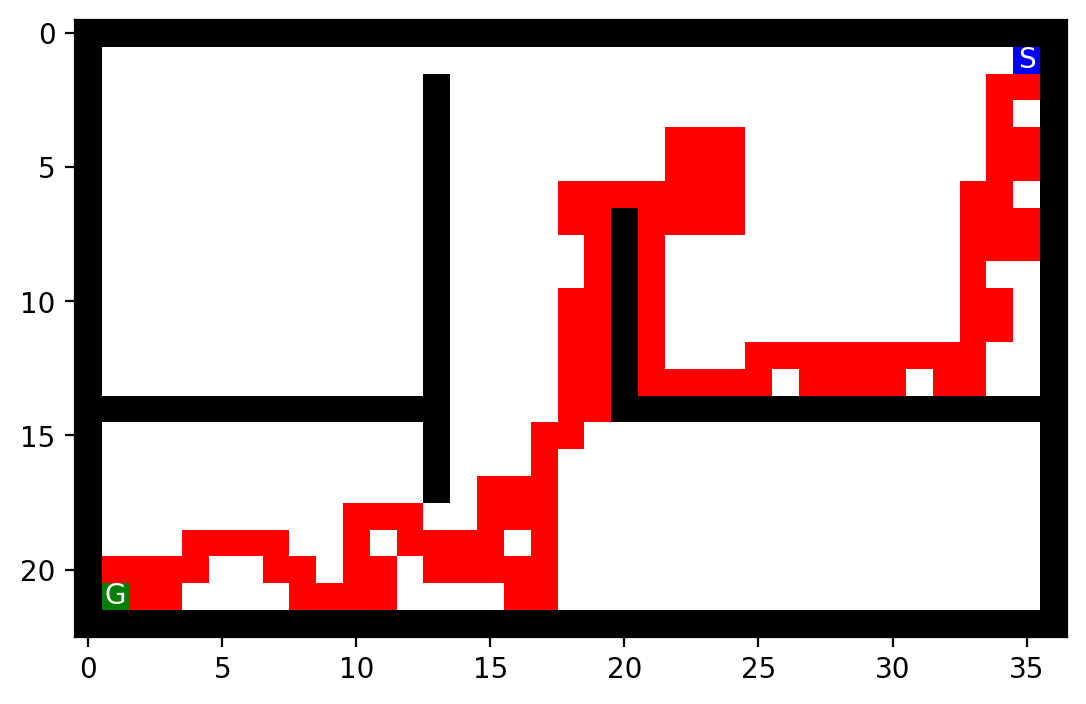

In [ ]:
#tree_search.set_order("NESW")
#tree_search.set_order("SENW")
#tree_search.set_order("WSEN")
tree_search.set_order(random = True)

%time result = IDS(maze, max_tries = 100000)
show_path(maze, result)

Directions are checked at every step in random order.
CPU times: user 1.74 s, sys: 51.9 ms, total: 1.79 s
Wall time: 1.7 s
Path length: 54
Reached squares: 682


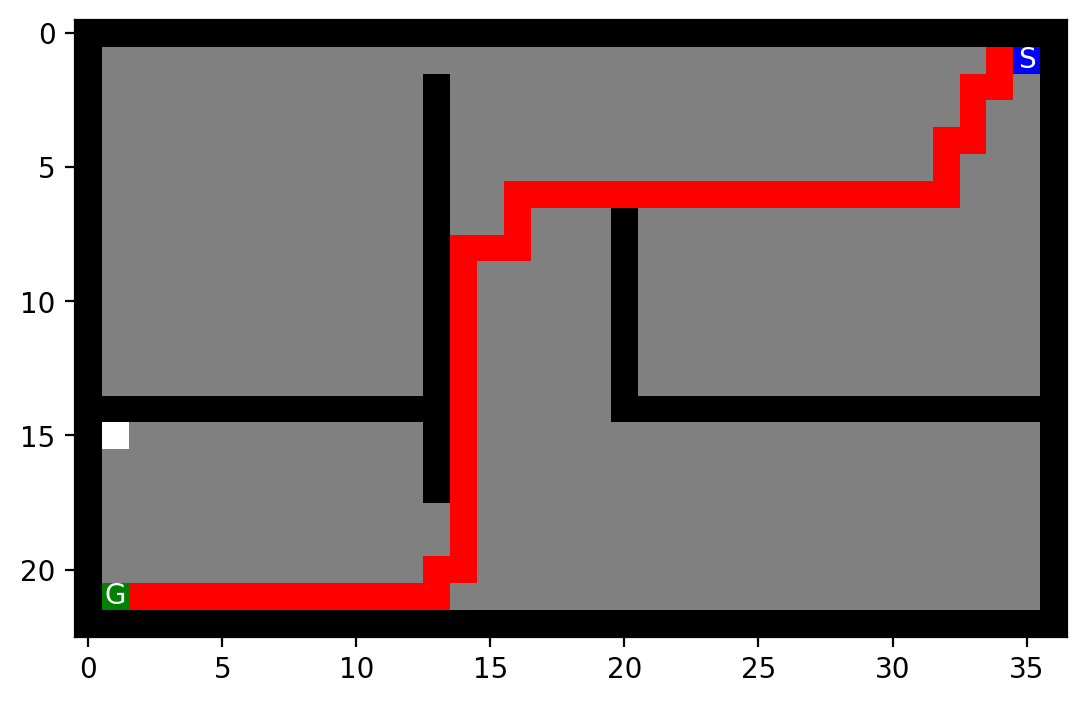

In [ ]:
# Use a reached structure. This does not use DFS in the proper way.

#tree_search.set_order("NESW")
#tree_search.set_order("SENW")
#tree_search.set_order("WSEN")
tree_search.set_order(random = True)

%time result = IDS_reached(maze, debug = False)
show_path(maze, result)

### GBFS

In [ ]:
# Note: DFS uses LIFO so the directions come from the stack in reverse order!
#tree_search.set_order("NESW")
tree_search.set_order("SENW")
#tree_search.set_order("WSEN")
#tree_search.set_order(random=True)

%time result = best_first_search(maze, strategy = "GBFS", debug = False, vis = False, animation = True)

animate_maze(result)

Directions are checked in the order ['S', 'E', 'N', 'W']
CPU times: user 184 ms, sys: 83.8 ms, total: 268 ms
Wall time: 149 ms
Path length: 54
Reached squares: 273
Action sequence: ['W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'S', 'S']


In [ ]:
# Note: DFS uses LIFO so the directions come from the stack in reverse order!
#tree_search.set_order("NESW")
#tree_search.set_order("SENW")
tree_search.set_order("WSEN")
#tree_search.set_order(random=True)

%time result = best_first_search(maze, strategy = "GBFS", debug = False, vis = False, animation = True)

animate_maze(result)

Directions are checked in the order ['W', 'S', 'E', 'N']
CPU times: user 2.24 ms, sys: 69 µs, total: 2.31 ms
Wall time: 2.32 ms
Path length: 14
Reached squares: 41
Action sequence: ['N', 'N', 'N', 'N', 'N', 'N', 'N', 'E', 'E', 'E', 'E', 'E', 'E', 'E']


In [ ]:
# Note: DFS uses LIFO so the directions come from the stack in reverse order!
#tree_search.set_order("NESW")
#tree_search.set_order("SENW")
#tree_search.set_order("WSEN")
tree_search.set_order(random = True)

%time result = best_first_search(maze, strategy = "GBFS", debug = False, vis = False, animation = True)

animate_maze(result)

Directions are checked at every step in random order.
CPU times: user 7.58 ms, sys: 0 ns, total: 7.58 ms
Wall time: 7.58 ms
Path length: 14
Reached squares: 37
Action sequence: ['N', 'N', 'N', 'N', 'E', 'N', 'E', 'E', 'E', 'N', 'N', 'E', 'E', 'E']


### A* Search

In [ ]:
# Note: DFS uses LIFO so the directions come from the stack in reverse order!
#tree_search.set_order("NESW")
tree_search.set_order("SENW")
#tree_search.set_order("WSEN")
#tree_search.set_order(random=True)

%time result = best_first_search(maze, strategy = "A*", debug = False, vis = False, animation = True)

animate_maze(result)

Directions are checked in the order ['S', 'E', 'N', 'W']
CPU times: user 17 ms, sys: 34 µs, total: 17 ms
Wall time: 16.3 ms
Path length: 14
Reached squares: 78
Action sequence: ['N', 'E', 'N', 'E', 'N', 'E', 'N', 'E', 'N', 'E', 'N', 'E', 'N', 'E']


In [ ]:
# Note: DFS uses LIFO so the directions come from the stack in reverse order!
#tree_search.set_order("NESW")
#tree_search.set_order("SENW")
tree_search.set_order("WSEN")
#tree_search.set_order(random = True)

%time result = best_first_search(maze, strategy = "A*", debug = False, vis = False, animation = True)

animate_maze(result)

Directions are checked in the order ['W', 'S', 'E', 'N']
CPU times: user 7.07 ms, sys: 98 µs, total: 7.17 ms
Wall time: 7.17 ms
Path length: 14
Reached squares: 41
Action sequence: ['N', 'N', 'N', 'N', 'N', 'N', 'N', 'E', 'E', 'E', 'E', 'E', 'E', 'E']


In [ ]:
# Note: DFS uses LIFO so the directions come from the stack in reverse order!
#tree_search.set_order("NESW")
#tree_search.set_order("SENW")
#tree_search.set_order("WSEN")
tree_search.set_order(random = True)

%time result = best_first_search(maze, strategy = "A*", debug = False, vis = False, animation = True)

animate_maze(result)

Directions are checked at every step in random order.
CPU times: user 6.74 ms, sys: 0 ns, total: 6.74 ms
Wall time: 6.64 ms
Path length: 14
Reached squares: 37
Action sequence: ['N', 'N', 'E', 'N', 'E', 'E', 'E', 'E', 'E', 'N', 'N', 'E', 'N', 'N']


### Weighted A* Search

$W > 1$ tends towards GBFS (optimality is not guaranteed)

In [ ]:
tree_search.set_order(random=True)

%time result = best_first_search(maze, strategy = "A*", W = 1+1e-9, debug = False, vis = False, animation = True)

animate_maze(result)

Directions are checked at every step in random order.
CPU times: user 7.38 ms, sys: 0 ns, total: 7.38 ms
Wall time: 7.33 ms
Path length: 14
Reached squares: 34
Action sequence: ['N', 'E', 'N', 'E', 'N', 'E', 'N', 'N', 'N', 'N', 'E', 'E', 'E', 'E']


In [ ]:
%time result = best_first_search(maze, strategy = "A*", W = 2, debug = False, vis = False, animation = True)

animate_maze(result)

CPU times: user 4.86 ms, sys: 159 µs, total: 5.02 ms
Wall time: 6.02 ms
Path length: 14
Reached squares: 32
Action sequence: ['N', 'E', 'E', 'E', 'N', 'E', 'N', 'E', 'N', 'E', 'N', 'E', 'N', 'N']


In [ ]:
%time result = best_first_search(maze, strategy = "A*", W = 1000, debug = False, vis = False, animation = True)

animate_maze(result)

CPU times: user 4.1 ms, sys: 4 µs, total: 4.1 ms
Wall time: 4.04 ms
Path length: 14
Reached squares: 35
Action sequence: ['N', 'E', 'E', 'N', 'N', 'N', 'E', 'N', 'E', 'E', 'E', 'N', 'N', 'E']


$W<1$ tends towards Uniform-Cost Search/BFS (optimality is guaranteed)

In [ ]:
%time result = best_first_search(maze, strategy = "A*", W = 1-1e-9, debug = False, vis = False, animation = True)

animate_maze(result)

CPU times: user 20 ms, sys: 3 µs, total: 20 ms
Wall time: 19.9 ms
Path length: 14
Reached squares: 92
Action sequence: ['N', 'E', 'N', 'E', 'N', 'E', 'N', 'E', 'N', 'E', 'N', 'E', 'N', 'E']


In [ ]:
%time result = best_first_search(maze, strategy = "A*", W = .1, debug = False, vis = False, animation = True)

animate_maze(result)

CPU times: user 44.3 ms, sys: 4 ms, total: 48.3 ms
Wall time: 46.5 ms
Path length: 14
Reached squares: 94
Action sequence: ['E', 'N', 'E', 'N', 'E', 'N', 'E', 'N', 'E', 'N', 'E', 'N', 'E', 'N']
